## Price filter for major indices

We already looked at a price filter for the S&P500 index [here](/posts/simple-regime-filter). 

Let us try it for some other common indices and see how it works on them.

List of indices to test

 * Dow Jones - United States
 * Russell 2000 - England
 * Nifty 50 - India
 * S&P500 - United States
 * Dax - Germany
 * Nikkei 225 - Japan
 * Hangseng - HongKong
 * Moex - Russia
 * SSE - China
 * Asx 200 - Australia
 * Euronext100 - Europe
 * Tsx Composite - Canada
 
I have downloaded the data from Yahoo from the start of 2000 and applied the moving average price filter for each of the indices. The `get data` function does all the data stuff. Finally, I group by each stock exchange and the price filter and take the daily mean of the returns.

In [15]:
import pandas as pd
import pandas_datareader as web
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(12,6)})

In [16]:
# parameters
ma = 60

# tickers are specified as name versus symbol in yahoo finance
tickers = {
    'dow': '^DJI',
    'russell': '^RUT',
    'nifty': '^NSEI',
    'snp500': '^GSPC',
    'dax': '^GDAXI',
    'nikkei': '^N225',
    'hangseng': '^HSI',
    'moex': 'IMOEX.me',
    'sse': '000001.SS',
    'asx': '^AXAT',
    'euronext': '^N100',
    'tsx comp': '^GSPTSE'
}

In [17]:
def get_data(index, name):
    """
    Get the data for the 
    """
    df = web.DataReader(index, 'yahoo', start='2000-01-01').rename(columns = lambda x: x.lower())
    df = df.sort_index()
    df['year'] = df.index.year
    df['ret'] = df.close.pct_change()
    df['ma_price'] = df.close.rolling(ma).median().shift(1)
    df['is_price'] = df.eval('close > ma_price')+0
    df['is_price'] = df.is_price.shift(1) # Shifting price since we use the signal only next day
    df['name'] = name
    return df

In [18]:
collect = []
for k,v in tickers.items():
    try:
        tmp = get_data(v, name=k)
        collect.append(tmp)
    except Exception as e:
        print(e)
df = pd.concat(collect)
    

<AxesSubplot:xlabel='name', ylabel='ret'>

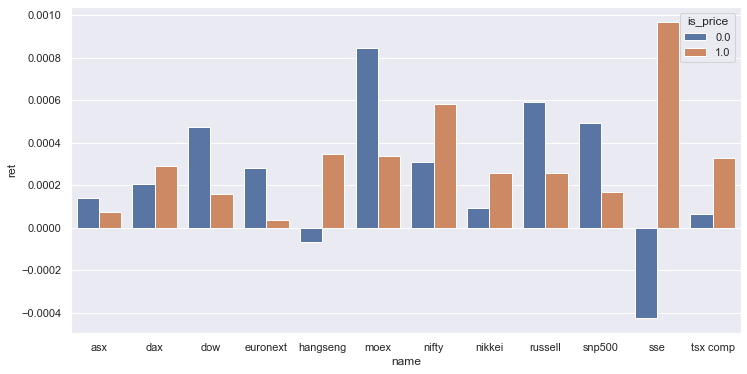

In [19]:
mean_returns = df.groupby(['name', 'is_price']).ret.mean().reset_index()
sns.barplot(data=mean_returns, x='name', y='ret', hue='is_price')

Looks like there is no common pattern among the indices.

And all except hangseng and see provide positive returns for both the filters.

On a second look, snp500, dow, russell,euronext does well with a filter of 0 while nifty,nikkei,sse,tsx does well with a filter of 1.

May be
 * the american and european markets exhibit different behaviour than the asian counterparts (but TSX is from Canada)
 * the older exchanges may exhibit a different behaviour than the new one
 * the timezone effect
 * or just plain random
 
I cannot come up with any conclusive explanation. This is a good topic to explore further with a whole lot of other indices

<div class="alert alert-warning">
    There is no substantial edge to practically trade this filter. Also, we have not run any statistical test to validate significance
    </div>

In [20]:
# Starting date from which data is computed
df.reset_index().groupby('name').Date.min().sort_values()

name
dow        1999-12-31
euronext   1999-12-31
russell    1999-12-31
snp500     1999-12-31
tsx comp   1999-12-31
dax        2000-01-03
hangseng   2000-01-03
nikkei     2000-01-04
sse        2000-01-04
asx        2007-06-15
nifty      2007-09-17
moex       2013-03-05
Name: Date, dtype: datetime64[ns]